In [2]:
import numpy as np
from scipy.optimize import linprog

# Part 3

In [5]:
def next_step(A, b, x, y, s, mu):

    m = x.shape[0]
    e = np.ones_like(x)

    X = np.diag(x)
    S = np.diag(s)
    S_inv = np.linalg.inv(S)

    mu_prime = (1 - (1/(6*np.sqrt(m)))) * mu

    k = np.linalg.inv(A @ S_inv @ X @ A.T) @ (b - mu_prime * A @ S_inv @ e)
    f = -A.T @ k
    h = -X @ S_inv @ f + mu_prime * S_inv @ e - x

    x_prime = x + h
    y_prime = y + k
    s_prime = s + f

    return(x_prime, y_prime, s_prime, mu_prime)


In [16]:
def next_step2(A, b, c, x, y, s):
    n = len(x)
    e = np.ones(n)

    X = np.diag(x)
    S = np.diag(s)

    # Residuals
    r_b = A @ x - b
    r_c = A.T @ y + s - c
    r_mu = X @ s

    mu = np.dot(x, s) / n

    # --- Predictor step (affine direction, sigma = 0) ---
    rhs3_aff = -r_mu
    rhs1_aff = -r_c
    rhs2_aff = -r_b

    # Form and solve reduced KKT system
    # Schur complement: A * (X^-1 * S) * A^T
    X_inv = np.diag(1.0 / x)
    XS_inv = X_inv @ S
    schur = A @ XS_inv @ A.T

    rhs = rhs2_aff - A @ XS_inv @ rhs1_aff
    dy_aff = np.linalg.solve(schur, rhs)
    ds_aff = -rhs1_aff - A.T @ dy_aff
    dx_aff = -X_inv @ (r_mu + S @ ds_aff)

    # --- Compute mu_aff ---
    x_aff = x + dx_aff
    s_aff = s + ds_aff
    mu_aff = np.dot(x_aff, s_aff) / n

    # --- Compute centering parameter ---
    sigma = (mu_aff / mu)**3

    # --- Corrector step RHS ---
    r_mu_corr = X @ s + dx_aff * ds_aff - sigma * mu * e
    rhs = -r_b + A @ X_inv @ (r_mu_corr - S @ ds_aff)
    dy = np.linalg.solve(schur, rhs)
    ds = -r_c - A.T @ dy
    dx = -X_inv @ (r_mu_corr - S @ ds)

    # Update variables
    x_next = x + dx
    y_next = y + dy
    s_next = s + ds
    mu_next = np.dot(x_next, s_next) / n

    return x_next, y_next, s_next, mu_next


# Part 6 
i will do the appropriate calculations in python to show that all the inequalities hold for the provided vectors:\
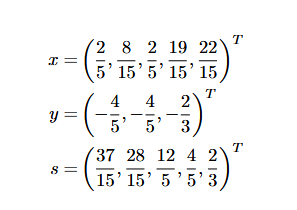

In [18]:
import numpy as np

#c, A, and b were already provided in the description of the LP.

c = np.array([-3, -4, 0, 0, 0])

A = np.array([[3, 3, 3, 0, 0],
              [3, 1, 0, 1, 0],
              [1, 4, 0, 0, 1]])

b = np.array([4, 3, 4])

#The following are the proposed feasible solution vectors

x = np.array([2/5, 8/15, 2/5, 19/15, 22/15])

y = np.array([-4/5, -4/5, -2/3])

s = np.array([37/15, 28/15, 12/5, 4/5, 2/3])

#It is clear that both s and x are non-negative

proposed_b = A @ x
display(b, proposed_b)

proposed_c = A.T @ y + s
display(c, proposed_c)

array([4, 3, 4])

array([4., 3., 4.])

array([-3, -4,  0,  0,  0])

array([-3.0000000e+00, -4.0000000e+00, -4.4408921e-16,  0.0000000e+00,
        0.0000000e+00])

Checking the conditions for starting point approprietness

In [4]:
cum_sum = 0
for i in range(len(x)):

    cum_sum += ((x[i]*s[i]-1)**2)

cum_sum

np.float64(0.002469135802469144)

In [11]:
#A, b, x, y, s are already set

epsilon = 1e-20
mu = 1

counter = 0

while True:

    x_prime, y_prime, s_prime, mu_prime = next_step(A, b, x, y, s, mu)

    if np.linalg.norm(x - x_prime) < epsilon and np.linalg.norm(y - y_prime) < epsilon and np.linalg.norm(s - s_prime) < epsilon:
        break

    x = x_prime
    y = y_prime
    s = s_prime
    mu = mu_prime

    counter += 1

for i in range(x_prime.shape[0]):

    if x_prime[i] < s_prime[i]:
        x_prime[i] = 0
    else:
        s_prime[i] = 0

print(x_prime, y_prime, s_prime, mu_prime, counter)

[0.44444444 0.88888889 0.         0.77777778 0.        ] [-8.88888889e-01 -8.69123446e-56 -3.33333333e-01] [0.         0.         2.66666667 0.         0.33333333] 6.759849026392404e-56 1639


"Analytical" solution\
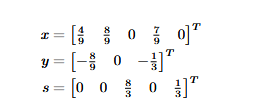\
Here we check the feasibility of the solution

In [24]:
x = np.array([4/9, 8/9, 0, 7/9, 0])
y = np.array([-8/9, 0, -1/3])
s = np.array([0, 0, 8/3, 0, 1/3])

print(A @ x, b)
print(A.T @ y + s, c)

[4. 3. 4.] [4 3 4]
[-3. -4.  0.  0.  0.] [-3 -4  0  0  0]


# Part 12
Using a commercial solver to see the results.

In [ ]:
#Starting point (4.5, 4.5)
r = 1.0

test_point1 = np.array([4.5, 4.5])
test_point2 = test_point1 + np.array([r, 0])
test_point3 = test_point1 + np.array([0, r])

nelder_mead_2d(test_point1, test_point2, test_point3, f3)

[[3.0000005 0.5000001]
 [2.9999995 0.4999999]
 [3.0000007 0.5000002]]


(np.float32(3.6415315e-14), array([3.0000005, 0.5000001], dtype=float32))

In [72]:
res_simplex = linprog(c=c, A_eq=A, b_eq=b, method="simplex")
res_simplex.x

C:\Users\matej\AppData\Local\Temp\ipykernel_28872\474665998.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_simplex = linprog(c=c, A_eq=A, b_eq=b, method="simplex")


array([0.44444444, 0.88888889, 0.        , 0.77777778, 0.        ])

In [73]:
res_interior_point = linprog(c=c, A_eq=A, b_eq=b, method="interior-point")
res_interior_point.x

C:\Users\matej\AppData\Local\Temp\ipykernel_28872\1934601974.py:1: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_interior_point = linprog(c=c, A_eq=A, b_eq=b, method="interior-point")


array([4.44444444e-01, 8.88888889e-01, 2.08281560e-13, 7.77777778e-01,
       1.89801298e-14])